Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [317]:
using QuantumOptics
using NBInclude
@nbinclude("Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")
@nbinclude("QOJulia_utils.ipynb")
@nbinclude("Chern_utils.ipynb")

calc_all_states_H_mb (generic function with 1 method)

# Parameters

In [253]:
param_dict=Dict{}()

LL = [3, 3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

nb = 1
t=-1
p=1
q=3
ϕ=p/q
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ

sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number;

pbc=true
param_dict["pbc"] = pbc;
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];
param_dict["neighbors_list"] = neighbors_list;

N1 = 10
N2 = 10
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

param_dict["Tx"] = Tx;
param_dict["Ty"] = Ty;

# Single Particle

In [254]:
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

In [255]:
param_dict["model_H1"] = get_Hofstadter_hamiltonian
H_T = get_Hofstadter_hamiltonian(param_dict);

In [256]:
H1 = get_sp_op(basis, H_T);

In [257]:
EE, UU = eigenstates(dense(H1));

### Single Particle Chern

In [258]:
param_dict["param_1"] = "Tx"
param_dict["param_2"] = "Ty"
EEA, UUA = calc_all_states_H1(param_dict);

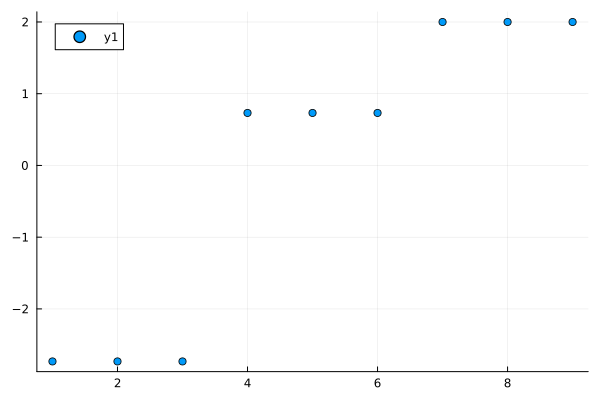

In [259]:
using Plots
scatter(real(EEA[1,1,:]))

In [260]:
bands = [[1,3],[4,6],[7,9]]
calc_chern_bands(UUA, bands)

3-element Vector{Any}:
                 1.0 + 1.8180514390136542e-16im
 -1.9999999999999998 - 4.3553168489658506e-17im
  1.0000000000000002 - 8.238962287498079e-17im

## Projected Single Particle

In [300]:
sub_states = get_subset_states(H1, 1:3);
subspace_proj, P, Pt = get_projector_op(basis, sub_states);
H1_proj = get_subspace_op(H1, P, Pt)
param_dict["subspace_proj"] = subspace_proj

Subspace(superbasis=NLevel(N=9), states:3)

### Projected Single Particle Chern

In [301]:
param_dict["sub_range"] = 4:6
EEA, UUA = calc_all_states_H1(param_dict);

In [302]:
bands = [[1,3]]
calc_chern_bands(UUA, bands)

1-element Vector{Any}:
 -1.9999999999999998 - 4.3553168489658506e-17im

# Many Body

In [303]:
delete!(param_dict, "sub_range");

In [304]:
PN = 2
param_dict["PN"] = PN
basis_mb = get_basis_mb(param_dict)

ManyBody(onebodybasis=NLevel(N=9), states:45)

In [305]:
param_dict["basis_mb"]

ManyBody(onebodybasis=NLevel(N=9), states:45)

In [306]:
param_dict["dimH_mb"] = length(basis_mb)

45

## Non-Interacting Many Body

In [307]:
basis_mb.shape[1]

45

In [308]:
H1_mb = get_mb_op(basis_mb, H1);

In [309]:
EEA, UUA = calc_all_states_H_mb(param_dict);

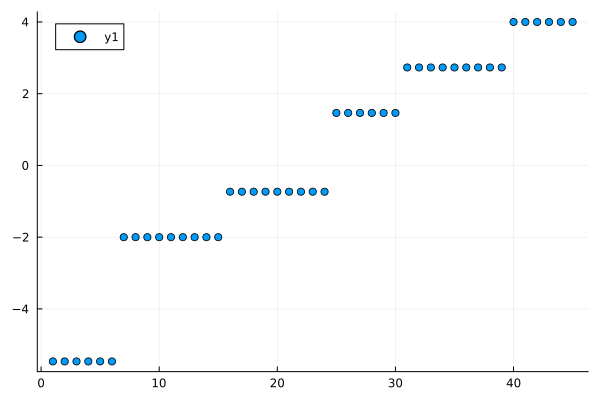

In [310]:
scatter(real(EEA[1,1,:]))

### Non-Interacting Many Body Chern

In [311]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
calc_chern_bands(UUA, bands)

6-element Vector{Any}:
   4.000000000000001 - 1.87922258889314e-16im
 -3.0000000000000004 - 5.950598317614407e-17im
   5.000000000000001 - 2.5544896802541842e-17im
                -6.0 + 6.731630523939041e-17im
                -3.0 + 5.815573141928428e-17im
  3.9999999999999996 - 7.157628482373384e-17im

## Interacting Many Body

### Interacting Many Body Chern

# Projected Many Body

In [312]:
param_dict["sub_range"] = 1:3;

In [329]:
param_dict["θθ"] = [0, 0]

2-element Vector{Int64}:
 0
 0

In [330]:
basis_mb_chern = get_basis_mb(param_dict);
param_dict["basis_mb_chern"] = basis_mb_chern

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:3), states:6)

In [331]:
param_dict["θθ"] = [0, 3]

2-element Vector{Int64}:
 0
 3

In [333]:
basis_mb_1 = get_basis_mb(param_dict)

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:3), states:6)

In [ ]:
subspace_proj_1 = SubspaceBasis(basis, proj_basis)
P = projector(subspace_proj, basis)

## Projected Non-Interacting Many Body

In [314]:
param_dict["dimH_mb"] = length(basis_mb)

6

In [325]:
EEA, UUA = calc_all_states_H_mb(param_dict);
EEA[1,1,:]

6-element Vector{Float64}:
 -5.4641016151377615
 -5.464101615137758
 -5.464101615137757
 -5.464101615137757
 -5.464101615137756
 -5.464101615137755

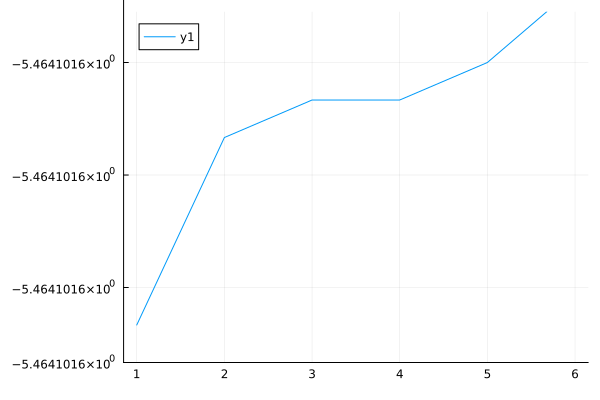

In [327]:
plot(EEA[1,1,:])

In [328]:
bands = [[1,6]]
calc_chern_bands(UUA, bands)

1-element Vector{Any}:
 3.6594741511432267e-17 + 3.5339496460705546e-17im

### Projected Many Body Chern